In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


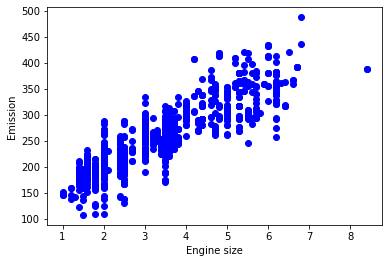

In [3]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.00213028]]
Intercept:  [125.34729414]


Question no. 4
a) when the engine size is 4.5 then,
    y=38.89*4.5+126.05
    y=301.06
    Hence, this linear regression model predicts 301.06 for CO2 Emissions
b) when the CO2 Emissions is 200 then,
    200=38.89*x+126.05
    x=1.90
    Hence, the model predicts 1.90 as the engine size.

Text(0, 0.5, 'Emission')

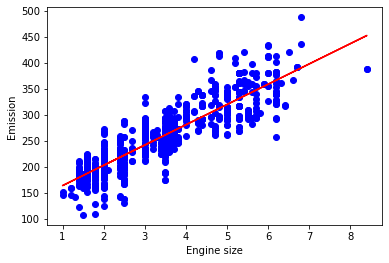

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [7]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 25.00
Residual sum of squares (MSE): 1143.95
R2-score: 0.61


A model is considered to be well-fitting when the disparities between the observed values and the model's projected values are minimal and unbiased. In this example, based on the metrics listed above, I believe that the linear regression model is very well-fitting.

In [15]:
regr_multi = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr_multi.fit (x, y)
# The coefficients
print ('Coefficients: ', regr_multi.coef_)
print ('Intercept: ',regr.intercept_)
df.head(13)

Coefficients:  [[11.12982242  7.7140989   9.20752271]]
Intercept:  [125.34729414]


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Question No. 9 
a) The model prediction for CO2 from row 0 when engine size is 2.0 is y = 11.12982242 x(2.0) + 7.7140989 x 4 + 9.20752271 x 8.5 + 125.34729414 = 256.727277615. 
b) Original CO2 emissions are 196 tons of CO2. The difference between the predicted and actual CO2 emissions is around 60.72 percent.
d) The model prediction for CO2 from row 12 when engine size is 5.9 is y = 11.12982242 x(5.9) + 7.7140989 x 12 + 9.20752271 x 15.6 + 125.34729414 = 427.21. 
e) Original CO2 emissions are 359 tons. The difference between predicted emissions and actual emissions is 68.21 tons of CO2.

In [16]:
y_hat=regr_multi.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
% np.mean((y_hat - y) ** 2))
# Explained score: 1 is perfect prediction
print('Score: %.2f' % regr_multi.score(x, y))

Residual sum of squares: 645.84
Score: 0.85


A multiple regression model includes more than one independent variable. So it outperforms a simple regression. On the test data above, I believe multiple regression is preferable.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.97586918 -4.51075886  0.92308991 -0.07543792]]
Intercept:  [112.16993134]


Question No.13                                                                                                         This ploynomial has a Quartic degree of complexity. When engiene size 4.5 we get 
y = 50.97586918(4.5^4) -4.51075886(4.5^3) + 0.92308991(4.5^2) -0.07543792(4.5) + 112.16993134 = 20622.7724859

Text(0, 0.5, 'Emission')

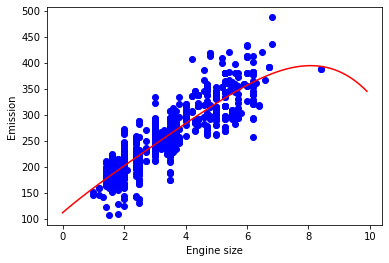

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX,
2)+clf.coef_[0][3]*np.power(XX, 3)+clf.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")